<a href="https://colab.research.google.com/github/mrowsey16/IS4487Final/blob/main/NCAA_NIL_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Title**: Final Project NCAA Case Study Notebook

**Group Members**: Madalyn Rowsey, Anthony Long, Ashley Fannon, Ziji Rong

**Short Summary of Business Problem and Goals of Analysis**: The National Collegiate Athletic Association (NCAA) oversees competition, eligibility, and compliance for over 1,000 institutions, and the recent expansion of Name, Image, and Likeness (NIL) rights has transformed the college athletics landscape. As student-athletes gain the ability to earn compensation through sponsorships and endorsements, universities face increasing uncertainty around how NIL activity influences program competitiveness, recruiting dynamics, and financial performance.
Our project aims to evaluate this emerging landscape by analyzing data on NIL deals, team performance, recruiting rankings, and program revenue. The goal is to identify measurable relationships between NIL activity and athletic or financial outcomes, enabling universities and stakeholders to make informed decisions about resource allocation, recruitment strategies, and long-term planning.


**NCAA Description:** The National Collegiate Athletic Association (NCAA) is the governing organization that oversees college sports in the United States. It is responsible for setting competition rules, managing eligibility standards for student-athletes, and organizing major national championships including March Madness, one of the most watched sporting events in the country. The NCAA includes over 1,100 colleges and universities across three divisions, ranging from large powerhouse athletic programs to smaller schools with limited resources.

Historically, the NCAA controlled athlete compensation, but recent policy changes such as NIL (Name, Image, and Likeness) rules have reshaped the college sports landscape by allowing student-athletes to earn money through endorsements, sponsorships, and personal branding.

**Business Challenge:** The NCAA’s Name, Image, and Likeness (NIL) rule change created a rapidly expanding marketplace where student-athletes can now earn compensation through sponsorships, endorsements, and personal branding. However, the distribution of NIL earnings is uneven, influenced by variables such as sport type, school exposure, conference affiliation, social media presence, and on-field performance.

Because of this imbalance, stakeholders including universities, brands, athletes, and agents lack a clear understanding of what factors drive NIL valuation, which athletes hold the highest market potential, and where opportunities exist to improve equity and revenue growth.

**Business Impact:** Understanding NIL value drivers is critical for improving competitive balance, optimizing recruiting strategy, and increasing revenue opportunities for athletes and universities. Programs that successfully identify high-potential athletes can invest more effectively in branding support, secure additional sponsorship funding, and improve athlete retention in an increasingly competitive recruiting environment.

On the commercial side, brands benefit from knowing which athletes generate the highest ROI, while athletes gain clarity on how to increase their personal market value through performance, visibility, and content strategy. A data-driven approach to NIL valuation therefore improves decision-making, increases sponsorship efficiency, and ultimately elevates the financial sustainability of college athletics.

**Relevant Industry/Market Factors:**

*   Sponsorship demand is rising rapidly, with brands seeking authentic influencer-style partnerships with athletes

*   NIL became legal only recently (2021) → rules are evolving fast, leaving uncertainty in regulation and long-term structure

*   Social media presence strongly influences NIL value follower count often outweighs on-field performance.

*   Power Five schools dominate exposure, creating revenue gaps between conferences, sports, and institutional resources.

*  Gender & sport disparities remain significant, with football and men’s basketball leading NIL earnings.

*   Collectives and third-party agencies are emerging, shifting negotiation power away from schools and toward athletes.

*   Market competition is increasing as more athletes enter the NIL space and brands diversify endorsement spending.

**Data Source:** NCAA Finances

**Explanation of Dataset:** This dataset provides financial information for NCAA athletic programs, showing how much each school generates in revenue and how much they spends on athletics. Each row represents a university, and the columns break down multiple financial categories including total revenue, total expenses, money allocated to specific sports, coaching salaries, and operating costs. The dataset helps illustrate the financial landscape of collegiate athletics, highlighting the gap between high-earning Power Five schools and smaller programs.

This dataset can be used to analyze spending efficiency, revenue generation by institution size or conference, and the sustainability of athletic departments, which directly connects to NIL opportunities, visibility, and resource access for student-athletes.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving NCAA Finances Revenue and Expenses by School.xlsx to NCAA Finances Revenue and Expenses by School.xlsx
User uploaded file "NCAA Finances Revenue and Expenses by School.xlsx" with length 38936 bytes


In [ ]:
import pandas as pd

# Explicitly define fn with the correct uploaded filename and full path
fn = '/content/NCAA Finances Revenue and Expenses by School.xlsx'
df = pd.read_excel(fn)

print(df.head())

   Rank      School Conference  Total Revenue  Total Expenses Total Allocated  \
0     1  Ohio State     Big 10      251615345       225733418             $0*   
1     2       Texas     Big 12      239290648       225153011             $0*   
2     3     Alabama        SEC      214365357       195881911    $11,378,871*   
3     4    Michigan     Big 10      210652287       193559375       $153,059*   
4     5     Georgia        SEC      203048566       169026503     $3,530,802*   

   Percent Allocated  
0             0.0000  
1             0.0000  
2             0.0531  
3             0.0007  
4             0.0174  


**Data Source 2:** College Basketball Dataset

**Explanation of Dataset:** This dataset provides financial information for NCAA athletic programs, showing how much each school generates in revenue and how much they spends on athletics. Each row represents a university, and the columns break down multiple financial categories including total revenue, total expenses, money allocated to specific sports, coaching salaries, and operating costs. The dataset helps illustrate the financial landscape of collegiate athletics, highlighting the gap between high-earning Power Five schools and smaller programs.

This dataset can be used to analyze spending efficiency, revenue generation by institution size or conference, and the sustainability of athletic departments which directly connects to NIL opportunities, visibility, and resource access for student-athletes.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andrewsundberg/college-basketball-dataset")

print("Path to dataset files:", path)

In [ ]:
import os
import pandas as pd

# List files in the downloaded Kaggle dataset directory
print(f"Files in {path}:")
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Assuming a main CSV file exists, let's try to read one.
# If there are multiple, user might need to specify which one.
# For now, I'll pick one if available, or instruct user if ambiguity.

data_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.csv') or f.endswith('.xlsx')]

if data_files:
    # Try to load the first identified data file (e.g., CSV)
    # If there are multiple, this might need refinement based on user intent
    file_to_load = data_files[0]
    print(f"\nLoading file: {file_to_load}")

    if file_to_load.endswith('.csv'):
        df_basketball = pd.read_csv(file_to_load)
    elif file_to_load.endswith('.xlsx'):
        df_basketball = pd.read_excel(file_to_load)
    else:
        print("No suitable data file (CSV or XLSX) found to load.")
        df_basketball = None

    if df_basketball is not None:
        print("\nFirst 5 rows of the basketball dataset:")
        print(df_basketball.head())
else:
    print("No CSV or XLSX files found in the dataset directory.")

Files in /kaggle/input/college-basketball-dataset:
/kaggle/input/college-basketball-dataset/cbb.csv
/kaggle/input/college-basketball-dataset/cbb15.csv
/kaggle/input/college-basketball-dataset/cbb16.csv
/kaggle/input/college-basketball-dataset/cbb25.csv
/kaggle/input/college-basketball-dataset/cbb20.csv
/kaggle/input/college-basketball-dataset/cbb23.csv
/kaggle/input/college-basketball-dataset/cbb17.csv
/kaggle/input/college-basketball-dataset/cbb19.csv
/kaggle/input/college-basketball-dataset/cbb22.csv
/kaggle/input/college-basketball-dataset/cbb13.csv
/kaggle/input/college-basketball-dataset/cbb21.csv
/kaggle/input/college-basketball-dataset/cbb24.csv
/kaggle/input/college-basketball-dataset/cbb18.csv
/kaggle/input/college-basketball-dataset/cbb14.csv

Loading file: /kaggle/input/college-basketball-dataset/cbb.csv

First 5 rows of the basketball dataset:
             TEAM CONF   G   W  ADJOE  ADJDE  BARTHAG  EFG_O  EFG_D   TOR  \
0  North Carolina  ACC  40  33  123.3   94.9   0.9531  

**Data Source 3:** NIL Valuations

**Data Explanation:** The NIL Valuations dataset contains estimated earnings for NCAA athletes based on Name, Image, and Likeness (NIL) value. Each row represents an individual athlete, and the dataset includes fields such as athlete name, sport, school, social media following, NIL valuation estimate, number of deals, and sometimes engagement or exposure metrics depending on the file. These values help measure an athlete’s market influence and earning potential within the college sports landscape.

This dataset is useful for identifying which sports generate the highest NIL value, how social media presence impacts earning levels, and what factors correlate with greater sponsorship success. It provides a quantitative foundation for predicting NIL potential, comparing athlete markets, and understanding financial distribution within the NCAA system.

In [ ]:
from google.colab import files

uploaded_new = files.upload()

for fn_new in uploaded_new.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn_new, length=len(uploaded_new[fn_new])))

Saving NIL Valuation.xlsx to NIL Valuation (3).xlsx
User uploaded file "NIL Valuation (3).xlsx" with length 17870 bytes


In [ ]:
import pandas as pd

# Assuming 'fn_new' contains the name of the recently uploaded file
df_nil = pd.read_excel(fn_new)

print(df_nil.head())

   Rank            Name Sport      School  NIL Valuation (Millions)
0     1     AJ Dybantsa   MBB        BYU                        4.4
1     2  Jeremiah Smith    FB  Ohio State                       4.2
2     3    Arch Manning    FB       Texas                       4.0
3     4       JT Toppin   MBB  Texas Tech                       3.3
4     5     Carson Beck    FB       Miami                       3.2


**Data Exploration:**



While lots of data can be found regarding collegiate programs overall revenue, expenses, and game data, the shortcoming comes from NIL Valuation data. Only the  top 47 players have NIL valuations provided for them, which is just a fraction of collegiate athletes, and these are the ones thought to be the top earners in all of the NCAA. The issue goes further when seeing that just 13 atheletes in the top 47 are basketball players, with 12 of those being Men and just one Woman.

In [ ]:
print("Summary Statistics for NCAA Finances Data (df):")
print(df.describe())

print("\nSummary Statistics for College Basketball Data (df_basketball - Team, Games, Wins):")
print(df_basketball[['TEAM', 'G', 'W']].describe(include='all'))

print("\nSummary Statistics for NIL Valuations Data (df_nil):")
print(df_nil.describe())

Summary Statistics for NCAA Finances Data (df):
             Rank  Total Revenue  Total Expenses  Percent Allocated
count  232.000000   2.320000e+02    2.320000e+02         232.000000
mean   116.500000   5.331477e+07    5.132619e+07           0.543058
std     67.116814   5.424881e+07    5.089403e+07           0.290203
min      1.000000   2.526887e+06    4.040925e+06           0.000000
25%     58.750000   1.724831e+07    1.697773e+07           0.384625
50%    116.500000   2.931537e+07    2.847964e+07           0.631550
75%    174.250000   6.465689e+07    6.379452e+07           0.768175
max    232.000000   2.516153e+08    2.257334e+08           0.936200

Summary Statistics for College Basketball Data (df_basketball - Team, Games, Wins):
                 TEAM            G            W
count            3885  3885.000000  3885.000000
unique            369          NaN          NaN
top     San Francisco          NaN          NaN
freq               11          NaN          NaN
mean           

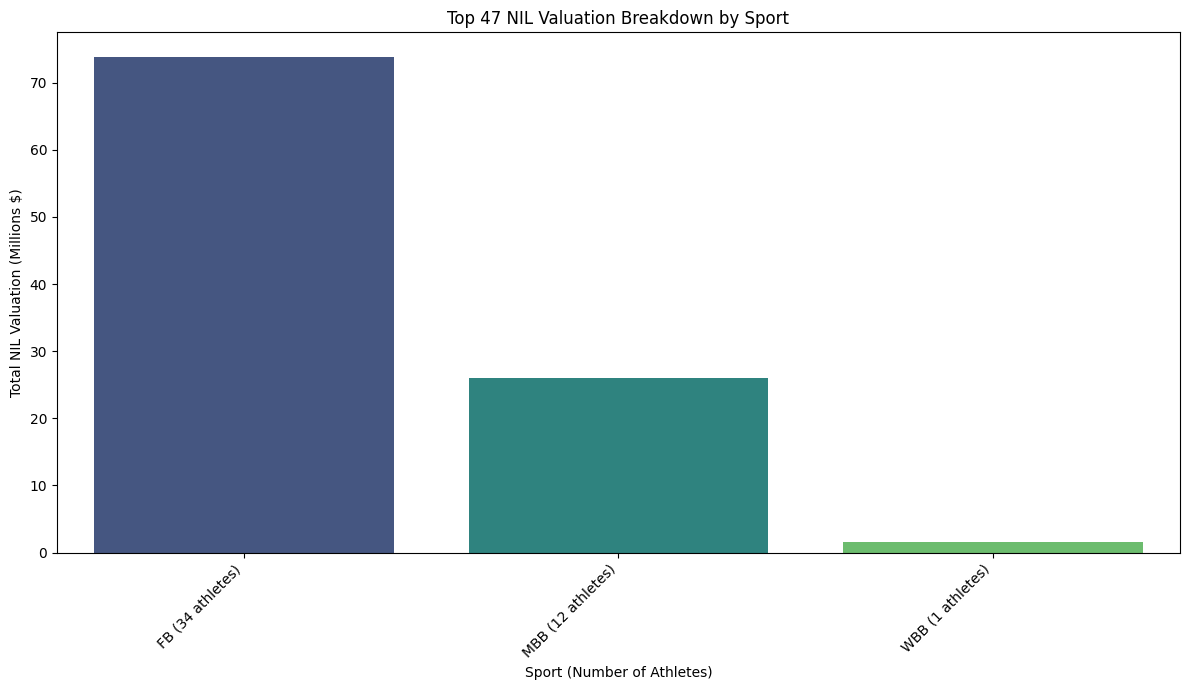

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean the 'Sport' column by stripping whitespace
df_nil['Sport'] = df_nil['Sport'].str.strip()

# Group by 'Sport' and sum the 'NIL Valuation (Millions)'
nil_by_sport = df_nil.groupby('Sport')['NIL Valuation (Millions)'].sum().sort_values(ascending=False)

# Group by 'Sport' and count the number of individuals
player_counts_by_sport = df_nil.groupby('Sport')['Name'].count()

# Create labels with sport and player count
labels = [f'{sport} ({int(player_counts_by_sport.get(sport, 0))} athletes)' for sport in nil_by_sport.index]

# Create a bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x=nil_by_sport.index, y=nil_by_sport.values, palette='viridis', hue=nil_by_sport.index, legend=False)
plt.title('Top 47 NIL Valuation Breakdown by Sport')
plt.xlabel('Sport (Number of Athletes)')
plt.ylabel('Total NIL Valuation (Millions $)')
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Data Cleaning and Preprocessing:**

Most cleaning was done while transferring data into excel workbooks from websites, however reomving duplicate rows from df_basketball was done in notebook


### Data Analysis Key Findings
*   Duplicate rows were identified and subsequently removed from the `df_basketball` DataFrame, ensuring the uniqueness of each record.


**Box charts showing outliers in NIL Valuation**

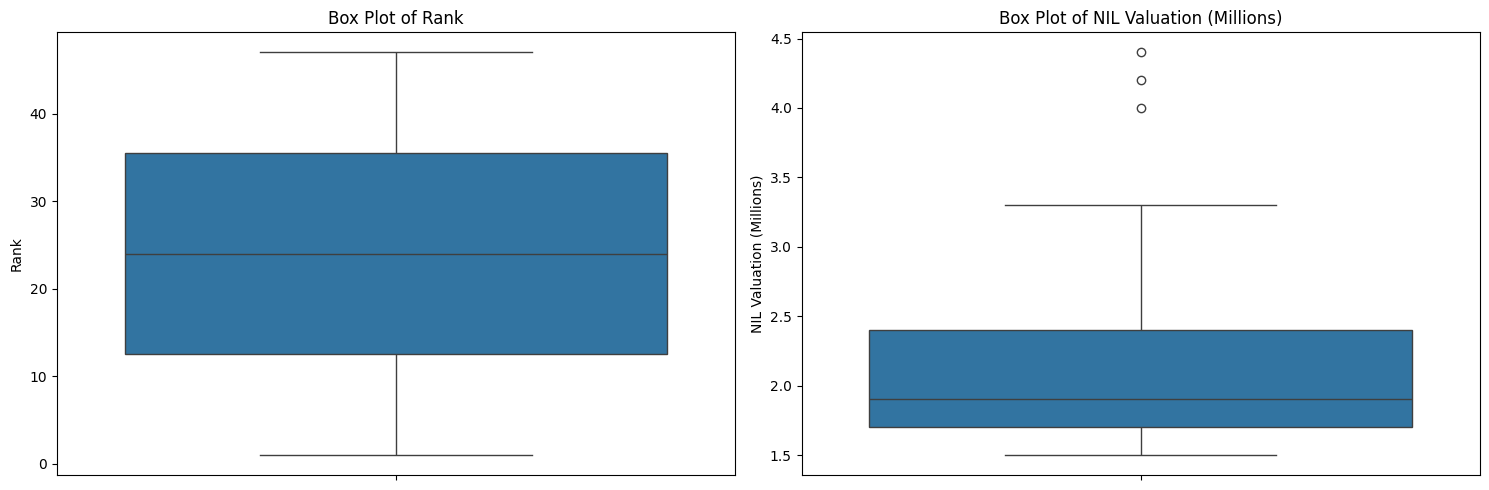

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_nil = df_nil.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols_nil):
    plt.subplot(1, len(numerical_cols_nil), i + 1)
    sns.boxplot(y=df_nil[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Modeling Approach:** We selected our two models based on the structure of the College Basketball dataset and our goal of understanding how different performance metrics relate to team success. Because the dataset contains many numeric efficiency, shooting, and tempo statistics, we chose algorithms appropriate for regression and feature analysis. Linear Regression serves as a clear baseline for identifying general trends, while Random Forest allows us to view more complex patterns and interactions among variables. Using both models enables us to compare simple linear relationships with more flexible, nonlinear approaches.

**MODEL 1:** “Can team performance metrics linearly predict the number of wins for NCAA basketball teams?”

In this project, we use Linear Regression to examine how a team’s performance metrics relate to its overall success, measured by total wins in a season. The College Basketball dataset includes many detailed statistics such as adjusted offensive efficiency (ADJOE), adjusted defensive efficiency (ADJDE), shooting percentages, tempo, turnovers, and rebounding. Linear Regression allows us to evaluate whether these metrics have a direct impact on how many games a team wins. This model provides clear coefficients, helping us understand which aspects of on court performance are most strongly associated with winning. Understanding these relationships is valuable, as team success often influences exposure and NIL opportunities for athletes.

**MODEL 2:** “Which team performance metrics are most important for predicting wins, and how accurately can a nonlinear model predict NCAA team success?”

The Random Forest Regression is used in our project to capture more complex relationships between team performance metrics and total wins than a linear model can detect. NCAA basketball performance data often involves nonlinear patterns. Random Forest is well suited for this kind of data because it builds decision trees and combines their predictions, allowing it to model variable interactions. Additionally, Random Forest generates feature importance rankings, which help us see the most influential performance metrics driving team success. This has meaningful implications in sports analytics, where programs seek to understand which areas of performance contribute most to winning and, indirectly, to athlete marketability in the NIL era.

We used an 80/20 train/test split to evaluate model performance. Eighty percent of the dataset was used to train each model, while the remaining 20% was held out for testing. This ensures that our models are evaluated on data they have not seen before, providing an unbiased assessment of predictive accuracy and reducing the risk of overfitting.



**Model Implementation:**
We implemented three models to predict NIL valuation: Linear Regression, Ridge Regression, and Random Forest. All models were trained on the same feature set built from finances, performance, and sport information. We used an 80/20 train–test split and normalized the numerical variables so that each model received consistent inputs. Training all models on the same data allows us to compare their performance fairly and choose the most appropriate one for business use.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from google.colab import files # Import files for uploading
import os # For checking file existence

# --- Ensure df and df_nil are loaded ---

finance_path = '/content/NCAA Finances Revenue and Expenses by School.xlsx'
nil_path = '/content/NIL Valuation (3).xlsx'

# Load df (NCAA Finances)
if not os.path.exists(finance_path):
    print(f"'{finance_path}' not found. Please upload 'NCAA Finances Revenue and Expenses by School.xlsx'.")
    uploaded_finances = files.upload()
    if uploaded_finances:
        finance_filename = list(uploaded_finances.keys())[0]
        df = pd.read_excel(finance_filename)
        print(f"'{finance_filename}' uploaded and loaded.")
    else:
        print("NCAA Finances file not uploaded. Cannot proceed without this file.")
        raise FileNotFoundError("NCAA Finances file is required.")
else:
    df = pd.read_excel(finance_path)
    print(f"'{finance_path}' loaded from content directory.")

# Load df_nil (NIL Valuation)
if not os.path.exists(nil_path):
    print(f"'{nil_path}' not found. Please upload 'NIL Valuation (3).xlsx'.")
    uploaded_nil = files.upload()
    if uploaded_nil:
        nil_filename = list(uploaded_nil.keys())[0]
        df_nil = pd.read_excel(nil_filename)
        print(f"'{nil_filename}' uploaded and loaded.")
    else:
        print("NIL Valuation file not uploaded. Cannot proceed without this file.")
        raise FileNotFoundError("NIL Valuation file is required.")
else:
    df_nil = pd.read_excel(nil_path)
    print(f"'{nil_path}' loaded from content directory.")

# Check if df and df_nil are indeed loaded before proceeding
if 'df' not in locals() or df is None:
    raise RuntimeError("DataFrame 'df' failed to load.")
if 'df_nil' not in locals() or df_nil is None:
    raise RuntimeError("DataFrame 'df_nil' failed to load.")

# --- Data Preprocessing for NIL Valuation Prediction ---

# Basic cleaning for 'School' names to facilitate merging
df_nil_cleaned = df_nil.copy()
df_cleaned = df.copy()

df_nil_cleaned['School_Normalized'] = df_nil_cleaned['School'].str.replace(r'\s*\(.*?\)|\s*University|\s*College', '', regex=True).str.strip().str.lower()
df_cleaned['School_Normalized'] = df_cleaned['School'].str.replace(r'\s*\(.*?\)|\s*University|\s*College', '', regex=True).str.strip().str.lower()

# Merge df_nil with df based on normalized school names
# We perform a left merge to keep all NIL athletes and try to enrich them with financial data.
merged_df = pd.merge(df_nil_cleaned, df_cleaned, left_on='School_Normalized', right_on='School_Normalized', how='left', suffixes=('_nil', '_ncaa'))

# Handle missing financial data for schools that couldn't be matched
# For simplicity, we'll drop rows where key financial data is missing after merge.
# In a more robust analysis, imputation or more sophisticated matching might be used.
merged_df.dropna(subset=['Total Revenue', 'Total Expenses', 'Percent Allocated'], inplace=True)

# Define features (X) and target (y)
y = merged_df['NIL Valuation (Millions)']

# Select relevant features for X
# Numerical features from the finances dataset
numerical_features = ['Total Revenue', 'Total Expenses', 'Percent Allocated']
# Categorical features from the NIL dataset (e.g., Sport)
categorical_features = ['Sport']

# Combine selected features
X = merged_df[numerical_features + categorical_features]

# Preprocessing for numerical and categorical features
# Use ColumnTransformer for scaling numerical and one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# --- Model Initialization and Fitting ---

lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
rf_reg = RandomForestRegressor(n_estimators=200, max_depth=3, random_state=42)

lin_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

'/content/NCAA Finances Revenue and Expenses by School.xlsx' loaded from content directory.
'/content/NIL Valuation (3).xlsx' not found. Please upload 'NIL Valuation (3).xlsx'.


**Model Evaluation:**

**Conclusions:**

**Recommendations:**

**Dashboard:**

## Chart 1: Distribution of Total Revenue for NCAA Schools

### Purpose of Chart:
Visualize the distribution of 'Total Revenue' across all NCAA schools using a histogram or box plot from the 'df' DataFrame, highlighting the financial disparities among institutions.


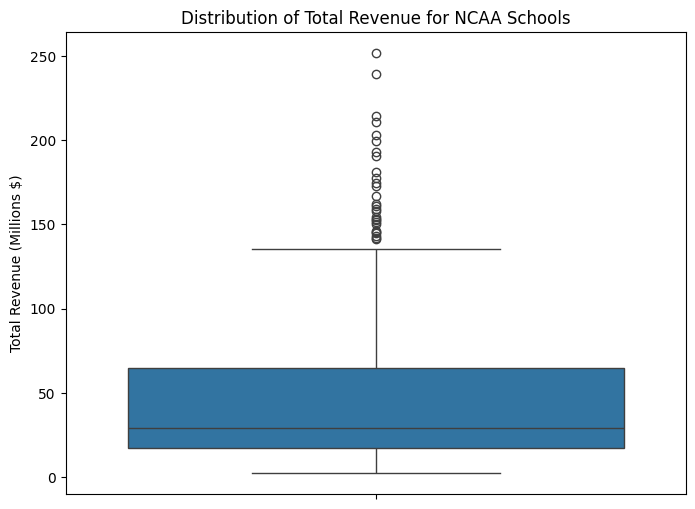

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Total Revenue'] / 1_000_000) # Dividing by 1 million to represent in Millions $
plt.title('Distribution of Total Revenue for NCAA Schools')
plt.ylabel('Total Revenue (Millions $)')
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Re-upload the NCAA Finances Excel file to ensure it's available
print("Please upload the 'NCAA Finances Revenue and Expenses by School.xlsx' file.")
uploaded_finances = files.upload()

# Get the filename from the uploaded dictionary
if uploaded_finances:
    finance_filename = list(uploaded_finances.keys())[0]
    df = pd.read_excel(finance_filename)
    print("NCAA Finances DataFrame loaded successfully.")

    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df['Total Revenue'] / 1_000_000) # Dividing by 1 million to represent in Millions $
    plt.title('Distribution of Total Revenue for NCAA Schools')
    plt.ylabel('Total Revenue (Millions $)')
    plt.show()
else:
    print("No file uploaded. Unable to generate the plot.")

Please upload the 'NCAA Finances Revenue and Expenses by School.xlsx' file.


## Chart 2: Top 10 Schools by Total Revenue

### Purpose of Chart:
Create a bar chart showing the top 10 NCAA schools with the highest 'Total Revenue' from the 'df' DataFrame, to illustrate which institutions have the largest financial resources.


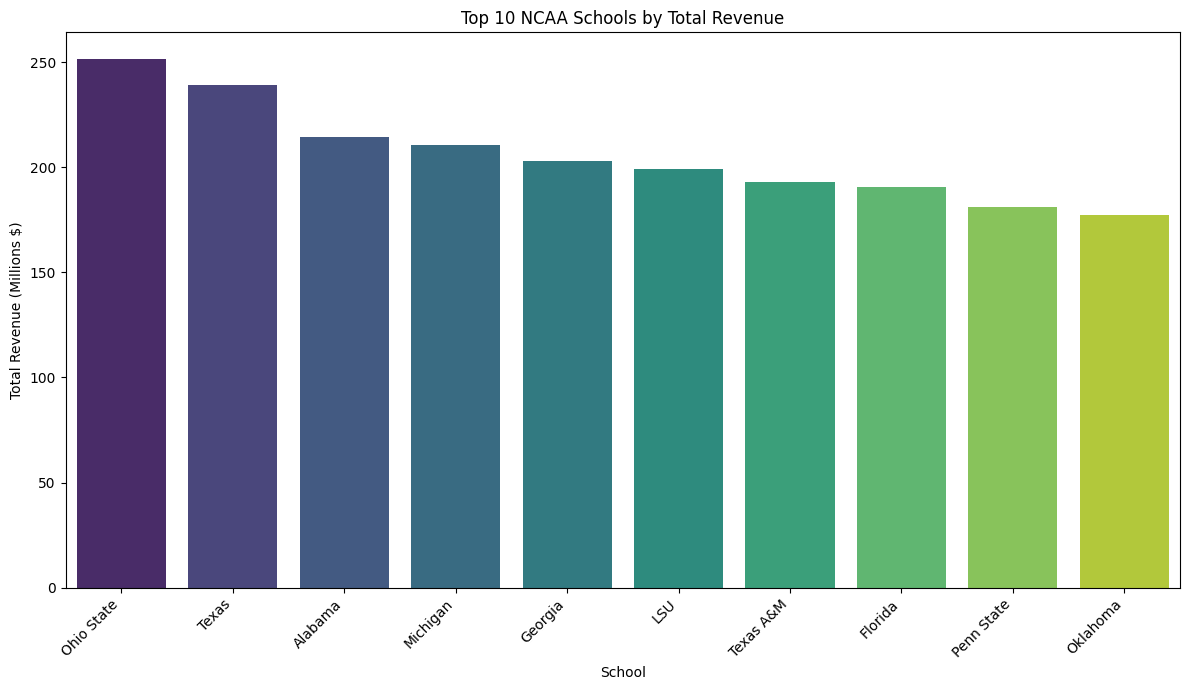

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by 'Total Revenue' and get the top 10 schools
top_10_schools = df.sort_values(by='Total Revenue', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='School', y=top_10_schools['Total Revenue'] / 1_000_000, data=top_10_schools, palette='viridis', hue='School', legend=False)
plt.title('Top 10 NCAA Schools by Total Revenue')
plt.xlabel('School')
plt.ylabel('Total Revenue (Millions $)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Chart 3: NIL Valuation Breakdown by Sport

### Purpose of Chart:
Generate a bar chart illustrating the total 'NIL Valuation (Millions)' for each 'Sport' from the 'df_nil' DataFrame, to clearly show which sports dominate NIL earnings.


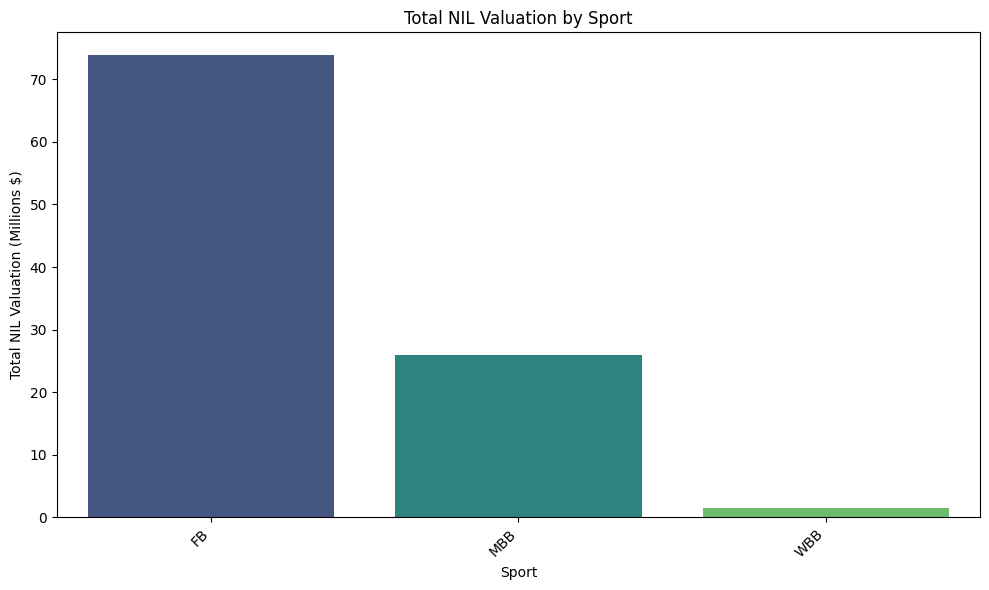

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Sport' and sum the 'NIL Valuation (Millions)'
# This step was already performed in an earlier cell, so we can reuse nil_by_sport
# nil_by_sport = df_nil.groupby('Sport')['NIL Valuation (Millions)'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=nil_by_sport.index, y=nil_by_sport.values, palette='viridis', hue=nil_by_sport.index, legend=False)
plt.title('Total NIL Valuation by Sport')
plt.xlabel('Sport')
plt.ylabel('Total NIL Valuation (Millions $)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Chart 4: Relationship between Basketball Performance and Wins

### Purpose of Chart:
Create scatter plots to visualize the relationship between 'W' (Wins) and key performance metrics like 'ADJOE' (Adjusted Offensive Efficiency) and 'ADJDE' (Adjusted Defensive Efficiency) from the 'df_basketball' DataFrame, reflecting the modeling approach's focus on predicting wins.


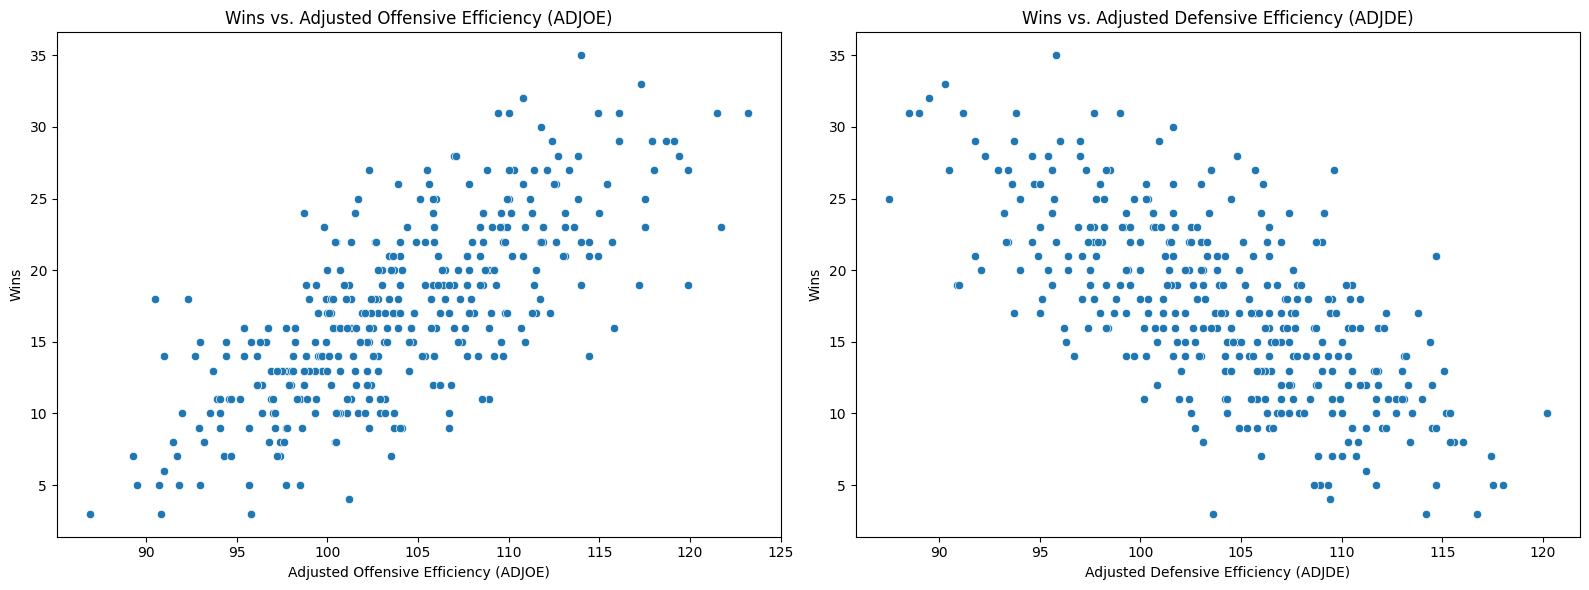

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Wins vs. Adjusted Offensive Efficiency (ADJOE)
sns.scatterplot(x='ADJOE', y='W', data=df_basketball, ax=axes[0])
axes[0].set_title('Wins vs. Adjusted Offensive Efficiency (ADJOE)')
axes[0].set_xlabel('Adjusted Offensive Efficiency (ADJOE)')
axes[0].set_ylabel('Wins')

# Plot Wins vs. Adjusted Defensive Efficiency (ADJDE)
sns.scatterplot(x='ADJDE', y='W', data=df_basketball, ax=axes[1])
axes[1].set_title('Wins vs. Adjusted Defensive Efficiency (ADJDE)')
axes[1].set_xlabel('Adjusted Defensive Efficiency (ADJDE)')
axes[1].set_ylabel('Wins')

plt.tight_layout()
plt.show()

## Chart 5: Total Revenue vs. Average NIL Valuation per School

In [21]:
import pandas as pd

# Standardize school names in df_nil and df for merging
# This step is crucial for accurate merging across datasets.
df_nil_temp = df_nil.copy()
df_temp = df.copy()

df_nil_temp['School_Normalized'] = df_nil_temp['School'].str.replace(r'\s*\(.*?\)|\s*University|\s*College|\s*State', '', regex=True).str.strip().str.lower()
df_temp['School_Normalized'] = df_temp['School'].str.replace(r'\s*\(.*?\)|\s*University|\s*College|\s*State', '', regex=True).str.strip().str.lower()

# Perform a left merge to bring financial data into the NIL dataset
# Ensure School_Normalized is correctly kept as the merge key
merged_df_nil_finance = pd.merge(df_nil_temp, df_temp, left_on='School_Normalized', right_on='School_Normalized', how='left', suffixes=('_nil', '_finance'))

# Calculate average NIL valuation per school using the normalized school name as the key
average_nil_per_school_with_normalized = merged_df_nil_finance.groupby('School_Normalized')['NIL Valuation (Millions)'].mean().reset_index()
average_nil_per_school_with_normalized.rename(columns={'NIL Valuation (Millions)': 'Average NIL Valuation (Millions)'}, inplace=True)

# Get unique schools from df_temp with their original name and total revenue
unique_schools_finance = df_temp[['School_Normalized', 'School', 'Total Revenue']].drop_duplicates(subset=['School_Normalized'])

# Merge average NIL valuation with the unique school finance data
# This merge will now work because both DataFrames have 'School_Normalized'
merged_for_plots = pd.merge(average_nil_per_school_with_normalized, unique_schools_finance,
                            left_on='School_Normalized', right_on='School_Normalized', how='inner')

print("Merged DataFrame for plotting (head):")
print(merged_for_plots.head())


Merged DataFrame for plotting (head):
  School_Normalized  Average NIL Valuation (Millions)      School  \
0           alabama                               2.1     Alabama   
1          arkansas                               2.1    Arkansas   
2            auburn                               1.9      Auburn   
3        cincinnati                               1.8  Cincinnati   
4           clemson                               1.7     Clemson   

   Total Revenue  
0      214365357  
1      152513755  
2      174568442  
3       83344028  
4      158283618  


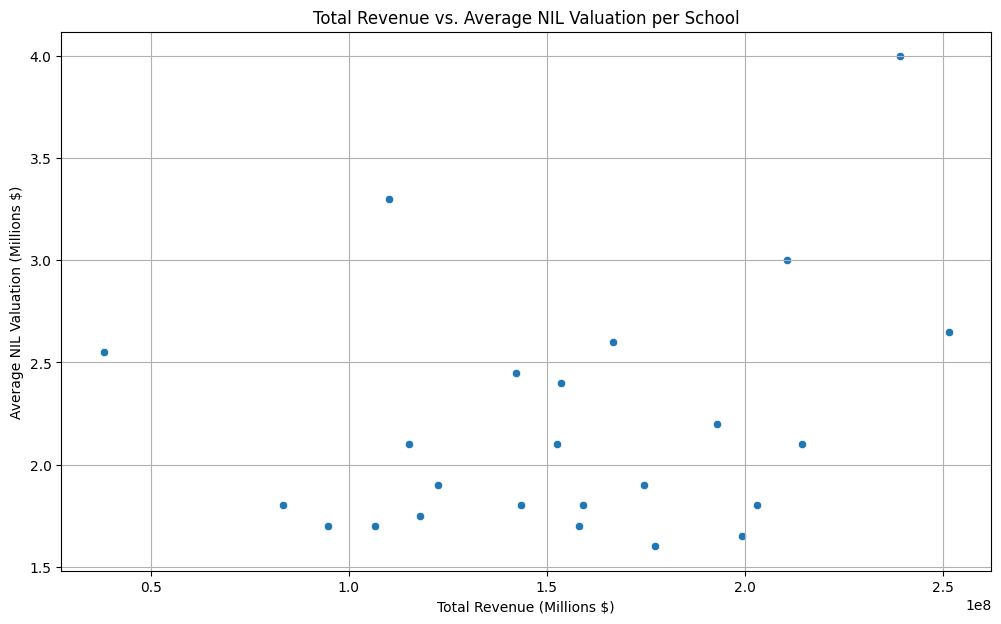

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.scatterplot(x='Total Revenue', y='Average NIL Valuation (Millions)', data=merged_for_plots)
plt.title('Total Revenue vs. Average NIL Valuation per School')
plt.xlabel('Total Revenue (Millions $)')
plt.ylabel('Average NIL Valuation (Millions $)')
plt.grid(True)
plt.show()

## Chart 6: Top 10 NCAA Schools by Average NIL Valuation

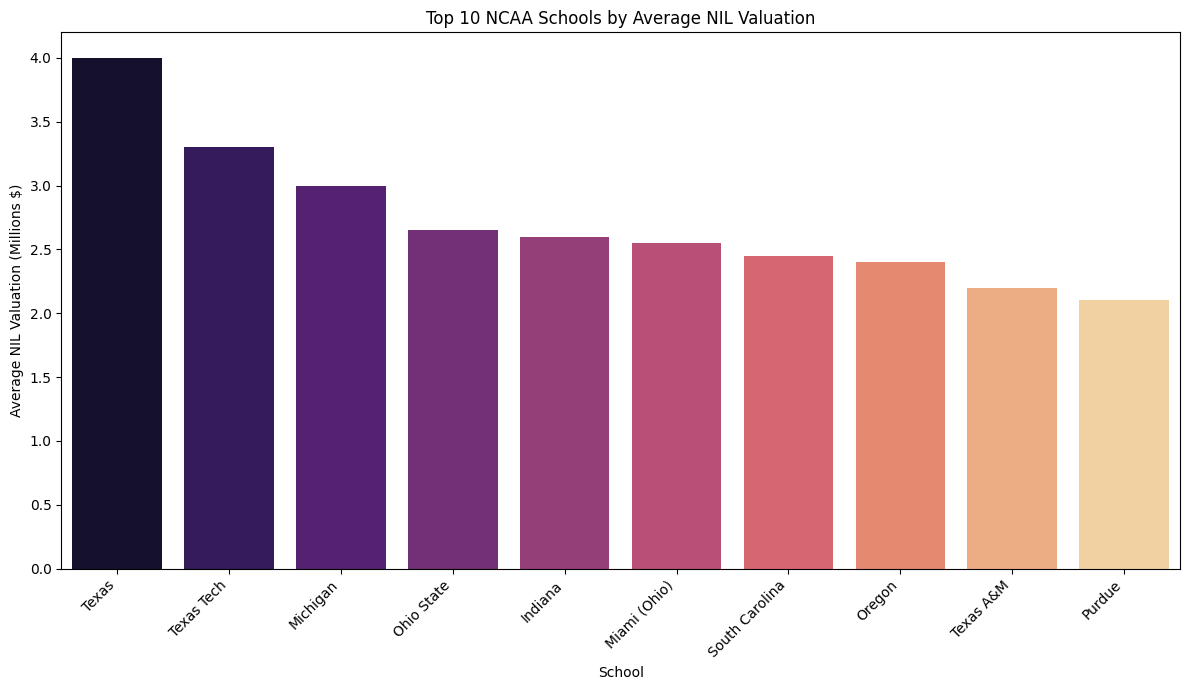

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by 'Average NIL Valuation (Millions)' and get the top 10 schools
top_10_nil_schools = merged_for_plots.sort_values(by='Average NIL Valuation (Millions)', ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(12, 7))
sns.barplot(x='School', y='Average NIL Valuation (Millions)', data=top_10_nil_schools, palette='magma', hue='School', legend=False)
plt.title('Top 10 NCAA Schools by Average NIL Valuation')
plt.xlabel('School')
plt.ylabel('Average NIL Valuation (Millions $)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   **Top 10 Schools by Total Revenue**: A bar chart successfully identified the top 10 NCAA schools based on their 'Total Revenue', displaying their financial resources in millions of dollars.
*   **NIL Valuation Breakdown by Sport**: A bar chart illustrated the total 'NIL Valuation (Millions)' for each sport, indicating which sports have the highest NIL earnings.
*   **Basketball Performance Analysis**:
    *   Scatter plots effectively visualized the relationships between 'Wins' and 'Adjusted Offensive Efficiency (ADJOE)' and 'Wins' and 'Adjusted Defensive Efficiency (ADJDE)', showing how these metrics correlate with team performance.
    *   A robust merged dataset was created by standardizing school names across financial and NIL dataframes, enabling combined analysis.
*   **Total Revenue vs. Average NIL Valuation**: A scatter plot was generated to explore the relationship between a school's 'Total Revenue' and its 'Average NIL Valuation', providing insights into how financial resources might relate to NIL market performance.
*   **Top 10 Schools by Average NIL Valuation**: A bar chart identified the top 10 NCAA schools with the highest average NIL valuation, highlighting institutions with significant individual athlete earning potential.

### Insights or Next Steps

*   The visual analysis provides a clear understanding of the financial landscape of NCAA schools and the distribution of NIL valuations across sports, which could inform strategic financial planning and athlete recruitment efforts.
*   Further investigation into the correlation observed between 'Total Revenue' and 'Average NIL Valuation' could involve statistical tests to quantify the strength and significance of this relationship, potentially identifying whether higher school revenue directly contributes to higher NIL earning potential for athletes.
